## School project - 5DEEP
The following notebook has been created for a school project on audio classification. The subject and the questions are available in the appendix.

The group members who participated in this project are:
- AMIMI Lamine
- BEZIN Théo
- LECOMTE Alexis
- PAWLOWSKI Maxence

### Main index
1. Data analysis
2. Data preprocessing
3. Basic ANN model
4. The CNN model
5. **The model competition (you are here)**
6. Data augmentation
7. _Appendix_

# 5 - The model competition
In the previous notebook, we built a CNN model that scored well on the dataset. In this notebook, we will create several CNN models, compare them, and elect one of them as the best. Each member of the group made a model, which will then fight for the first place.

### Index
<ol type="A">
  <li>Notebook initialization</li>
  <li>Data preparation</li>
  <li>Building the models</li>
  <li>Evaluating the models</li>
  <li>Voting for the best model</li>
  <li>Conclusion of the model competition</li>
</ol>

## A - Notebook initialization
### A.1 - Imports

In [2]:
# OS and filesystem
import os
import sys
from pathlib import Path
from timeit import default_timer as timer
from datetime import timedelta

# Math
import numpy

# Data
from matplotlib import pyplot

# Model processing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow import keras

# Console output
from colorama import Style

# Local files
sys.path.append(os.path.join(os.pardir, os.pardir))
import helpers

### A.2 - Package initialization

In [3]:
pyplot.style.use("ggplot")  # Set the matplotlib style
keras.backend.set_image_data_format("channels_last")  # Define the last value of the model input shape as the color channel

### A.3 - Constants

In [4]:
# Filesystem paths
PARENT_FOLDER = Path.cwd()
DATA_FOLDER = (PARENT_FOLDER / ".." / ".." / "data").resolve()
URBAN_DATASET_FOLDER = DATA_FOLDER / "UrbanSound8K"
MODELS_FOLDER = (PARENT_FOLDER / ".." / ".." / "models").resolve()
TEMP_FOLDER = (PARENT_FOLDER / ".." / ".." / "temp").resolve()

# Dataset
CLASSES = ["air_conditioner", "car_horn", "children_playing", "dog_bark", "drilling", "engine_idling", "gun_shot", "jackhammer", "siren", "street_music"]
N_MELS = 128

# Misc.
RANDOM_STATE = 2077

### A.4 - Dataset loading

In [5]:
features_x = numpy.load(file=(str(DATA_FOLDER / "x-mel-spectrograms_13-02-23_14-44.npy")))
features_y = numpy.load(file=(str(DATA_FOLDER / "y-mel-spectrograms_13-02-23_14-44.npy")))

## B - Data preparation
### B.1 - Label encoding

In [6]:
label_encoder = LabelEncoder()
features_y = keras.utils.to_categorical(y=label_encoder.fit_transform(features_y), num_classes=len(CLASSES))

### B.2 - Dataset splitting

In [7]:
x_train, x_test, y_train, y_test = train_test_split(features_x, features_y, test_size=0.2, random_state=RANDOM_STATE)

print(f"{Style.BRIGHT}Train set >{Style.RESET_ALL} rows: (x={len(x_train)}, y={len(y_train)}) | shape: (x={x_train.shape}, y={y_train.shape})")
print(f"{Style.BRIGHT}Test set >{Style.RESET_ALL} rows: (x={len(x_test)}, y={len(y_test)}) | shape: (x={x_test.shape}, y={y_test.shape})")

Train set > rows: (x=6985, y=6985) | shape: (x=(6985, 128, 173), y=(6985, 10))
Test set > rows: (x=1747, y=1747) | shape: (x=(1747, 128, 173), y=(1747, 10))


In [8]:
num_columns = 173
num_channels = 1

x_train = x_train.reshape(x_train.shape[0], N_MELS, num_columns, num_channels)
x_test = x_test.reshape(x_test.shape[0], N_MELS, num_columns, num_channels)

## C - Building the models
In this section, we will define each of the models before training them on the dataset.

### C.1 - First model: Milva
The first competitor is the model we made in the previous booklet. Milva, as it is called, is a CNN model with three convolution blocks and two  [Dense](https://keras.io/api/layers/core_layers/dense/) layers to normalize the output.

Model: "CNN_Milva"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 125, 170, 32)      544       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 62, 85, 32)       0         
 2D)                                                             
                                                                 
 activation_3 (Activation)   (None, 62, 85, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 59, 82, 64)        32832     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 20, 64)       0         
 2D)                                                             
                                                                 
 activation_4 (Activation)   (None, 14, 20, 64)        0 

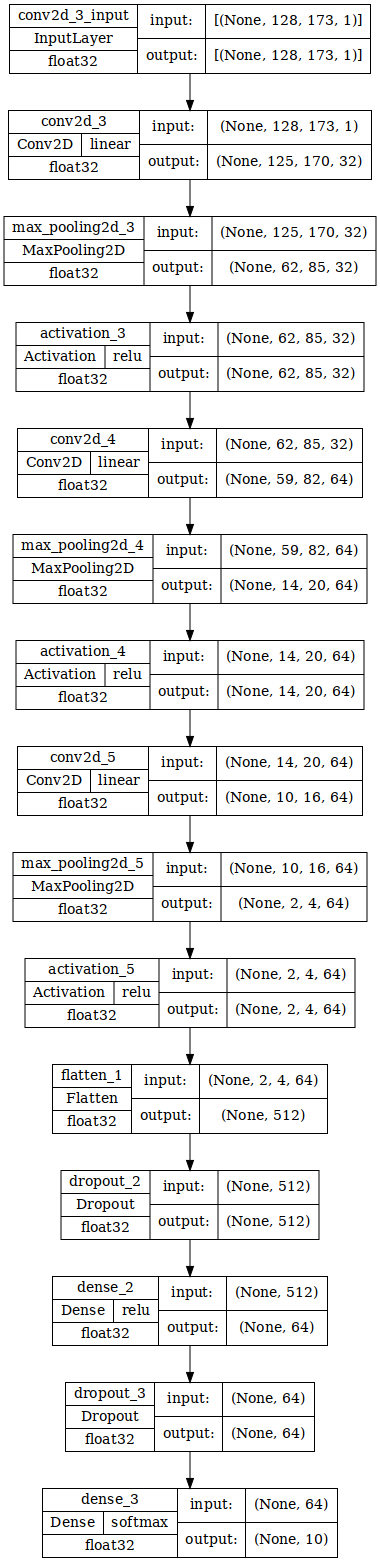

In [10]:
model_milva = helpers.ckpts.load_best_model(models_folder=MODELS_FOLDER, base_name="2_model-cnn-milva-ckpt")
model_milva.summary()
keras.utils.plot_model(
    model_milva,
    show_shapes=True, show_dtype=True, show_layer_names=True, show_layer_activations=True,
    rankdir="TB", dpi=72,
    to_file=(TEMP_FOLDER / "model_cnn_milva.png")
)

### C.2 - Second model: Chandelle
**TODO: Model description**

Model: "CNN_Chandelle"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 171, 64)      640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 85, 64)       0         
 )                                                               
                                                                 
 activation (Activation)     (None, 63, 85, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 83, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 41, 64)       0         
 2D)                                                             
                                                                 
 activation_1 (Activation)   (None, 30, 41, 64)      

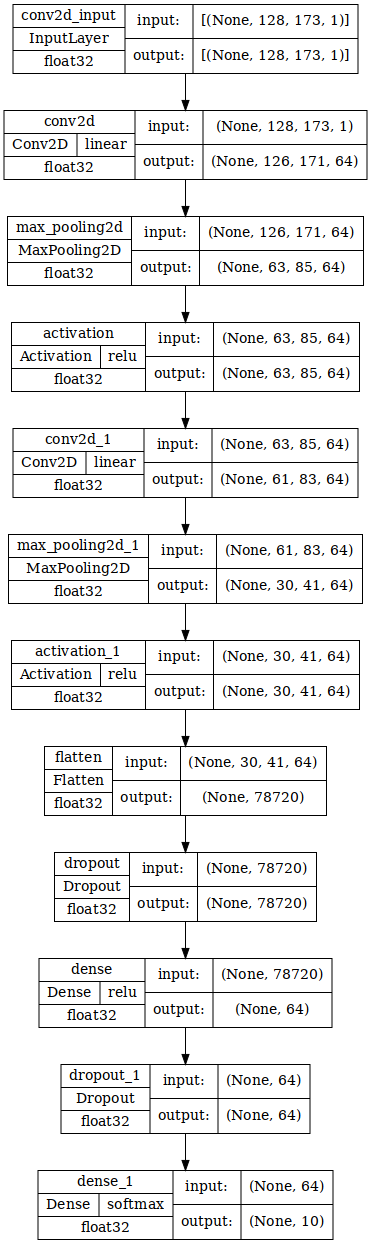

In [11]:
# Model definition
model_chandelle = keras.models.Sequential(name="CNN_Chandelle", layers=[
    # First convolution block
    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), input_shape=(N_MELS, num_columns, num_channels)),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Activation("relu"),

    # Second convolution block
    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding="valid"),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Activation("relu"),

    # Flatten and dropout
    keras.layers.Flatten(),
    keras.layers.Dropout(rate=0.1),

    # First dense block
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dropout(rate=0.5),

    # Second dense block. Using softmax to reduce to output to 10
    keras.layers.Dense(len(CLASSES), activation="softmax")
])

# Model summary and plot
model_chandelle.summary()
keras.utils.plot_model(
    model_chandelle,
    show_shapes=True, show_dtype=True, show_layer_names=True, show_layer_activations=True,
    rankdir="TB", dpi=72,
    to_file=(TEMP_FOLDER / "model_cnn_chandelle.png")
)

In [12]:
adam_optimizer = keras.optimizers.Adam(learning_rate=0.001)
model_chandelle.compile(loss="categorical_crossentropy", optimizer=adam_optimizer, metrics=["accuracy"])

In [11]:
chandelle_ckpt_name_base = "3_model-cnn-chandelle-ckpt"

checkpoint_callback = keras.callbacks.ModelCheckpoint(
    filepath=str(MODELS_FOLDER / f"{chandelle_ckpt_name_base}_e-{{epoch:02d}}_vloss-{{val_loss:.2f}}.hdf5"),
    monitor="val_loss",
    save_best_only=True,
    verbose=0
)

In [14]:
batch_size = 128
epochs = 200

start_time = timer()
training_chandelle = model_chandelle.fit(x=x_train, y=y_train, validation_split=0.080, batch_size=batch_size, epochs=epochs, callbacks=[checkpoint_callback], verbose=1)
print(f"The training of the \"{model_chandelle.name}\" model took {timedelta(seconds=(timer() - start_time))}.")

2023-02-15 21:32:10.876096: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 569189376 exceeds 10% of free system memory.
2023-02-15 21:32:11.564889: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 569189376 exceeds 10% of free system memory.


Epoch 1/200


2023-02-15 21:32:25.448424: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8100
2023-02-15 21:32:44.261846: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-02-15 21:32:53.828028: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x7f07e400c360 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-02-15 21:32:53.828083: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA GeForce GTX 1080, Compute Capability 6.1
2023-02-15 21:32:54.338118: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-02-15 21:32:56.364644: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-02-15 21:32:56.779289: I tensorflow/compiler/jit/xla_compilati

51/51 [==============================] - 55s 109ms/step - loss: 2.0536 - accuracy: 0.3078 - val_loss: 1.4799 - val_accuracy: 0.5081
Epoch 2/200
51/51 [==============================] - 5s 97ms/step - loss: 1.4765 - accuracy: 0.4932 - val_loss: 1.0896 - val_accuracy: 0.6422
Epoch 3/200
51/51 [==============================] - 5s 106ms/step - loss: 1.1909 - accuracy: 0.5927 - val_loss: 0.9067 - val_accuracy: 0.7156
Epoch 4/200
51/51 [==============================] - 5s 97ms/step - loss: 1.0039 - accuracy: 0.6629 - val_loss: 0.7842 - val_accuracy: 0.7603
Epoch 5/200
51/51 [==============================] - 5s 97ms/step - loss: 0.8440 - accuracy: 0.7182 - val_loss: 0.7119 - val_accuracy: 0.7746
Epoch 6/200
51/51 [==============================] - 5s 104ms/step - loss: 0.7465 - accuracy: 0.7465 - val_loss: 0.6844 - val_accuracy: 0.7692
Epoch 7/200
51/51 [==============================] - 5s 105ms/step - loss: 0.6456 - accuracy: 0.7823 - val_loss: 0.6709 - val_accuracy: 0.7710
Epoch 8/200
5

In [12]:
model_chandelle = helpers.ckpts.load_best_model(models_folder=MODELS_FOLDER, base_name=chandelle_ckpt_name_base)

### C.3 - Third model: Toto
**TODO: Model description**

Model: "CNN_Toto"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 126, 171, 32)      320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 63, 85, 32)       0         
 2D)                                                             
                                                                 
 activation_2 (Activation)   (None, 63, 85, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 83, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 15, 21, 64)       0         
 2D)                                                             
                                                                 
 activation_3 (Activation)   (None, 15, 21, 64)        0  

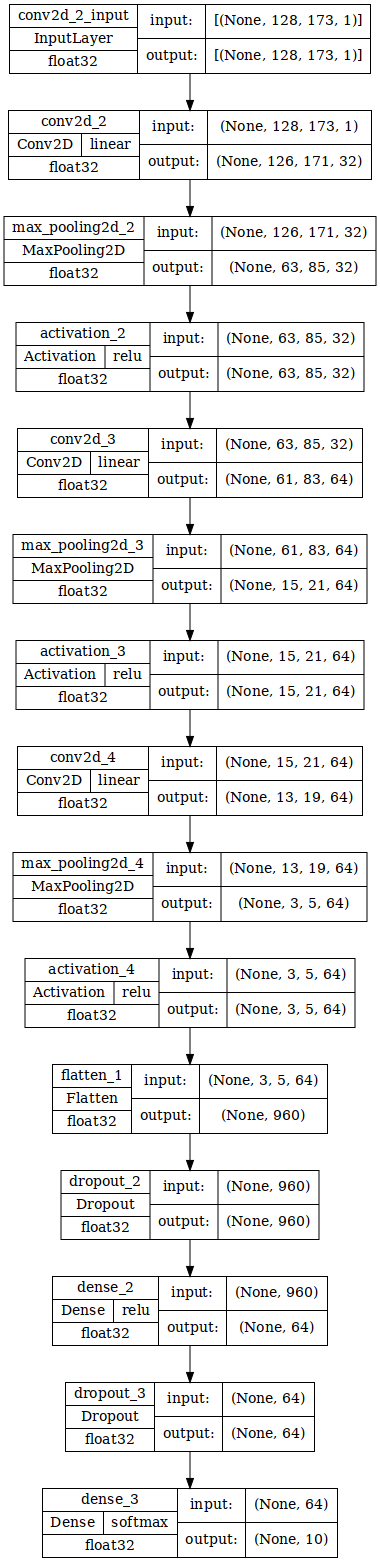

In [16]:
# Model definition
model_toto = keras.models.Sequential(name="CNN_Toto", layers=[
    # First convolution block
    keras.layers.Conv2D(filters=32, kernel_size=(3, 3), input_shape=(N_MELS, num_columns, num_channels)),
    keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    keras.layers.Activation("relu"),

    # Second convolution block
    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding="valid"),
    keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(4, 4)),
    keras.layers.Activation("relu"),

    # Third convolution block
    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding="valid"),
    keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(4, 4)),
    keras.layers.Activation("relu"),

    # Flatten and dropout
    keras.layers.Flatten(),
    keras.layers.Dropout(rate=0.2),

    # First dense block
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dropout(rate=0.2),

    # Second dense block. Using softmax to reduce to output to 10
    keras.layers.Dense(len(CLASSES), activation="softmax")
])

# Model summary and plot
model_toto.summary()
keras.utils.plot_model(
    model_toto,
    show_shapes=True, show_dtype=True, show_layer_names=True, show_layer_activations=True,
    rankdir="TB", dpi=72,
    to_file=(TEMP_FOLDER / "model_cnn_toto.png")
)

In [17]:
adam_optimizer = keras.optimizers.Adam(learning_rate=0.001)
model_toto.compile(loss="categorical_crossentropy", optimizer=adam_optimizer, metrics=["accuracy"])

In [13]:
toto_ckpt_name_base = "4_model-cnn-toto-ckpt"

checkpoint_callback = keras.callbacks.ModelCheckpoint(
    filepath=str(MODELS_FOLDER / f"{toto_ckpt_name_base}_e-{{epoch:02d}}_vloss-{{val_loss:.2f}}.hdf5"),
    monitor="val_loss",
    save_best_only=True,
    verbose=0
)

In [19]:
batch_size = 128
epochs = 200

start_time = timer()
training_toto = model_toto.fit(x=x_train, y=y_train, validation_split=0.080, batch_size=batch_size, epochs=epochs, callbacks=[checkpoint_callback], verbose=1)
print(f"The training of the \"{model_toto.name}\" model took {timedelta(seconds=(timer() - start_time))}.")

2023-02-15 22:05:30.524726: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 569189376 exceeds 10% of free system memory.
2023-02-15 22:05:30.944101: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 569189376 exceeds 10% of free system memory.


Epoch 1/200
51/51 [==============================] - 6s 72ms/step - loss: 1.9072 - accuracy: 0.3203 - val_loss: 1.5385 - val_accuracy: 0.4866
Epoch 2/200
51/51 [==============================] - 11s 221ms/step - loss: 1.5054 - accuracy: 0.4617 - val_loss: 1.3515 - val_accuracy: 0.5403
Epoch 3/200
51/51 [==============================] - 6s 115ms/step - loss: 1.3011 - accuracy: 0.5489 - val_loss: 1.1809 - val_accuracy: 0.5975
Epoch 4/200
51/51 [==============================] - 11s 215ms/step - loss: 1.1354 - accuracy: 0.6096 - val_loss: 1.0464 - val_accuracy: 0.6351
Epoch 5/200
51/51 [==============================] - 4s 74ms/step - loss: 1.0144 - accuracy: 0.6531 - val_loss: 0.8979 - val_accuracy: 0.6887
Epoch 6/200
51/51 [==============================] - 4s 79ms/step - loss: 0.9131 - accuracy: 0.6903 - val_loss: 0.8202 - val_accuracy: 0.7335
Epoch 7/200
51/51 [==============================] - 3s 59ms/step - loss: 0.8343 - accuracy: 0.7191 - val_loss: 0.7723 - val_accuracy: 0.7370
E

In [14]:
model_toto = helpers.ckpts.load_best_model(models_folder=MODELS_FOLDER, base_name=toto_ckpt_name_base)

### C.4 - Fourth model: <NO_NAME>
**TODO: Model description**

Model: "CNN_NONAME"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 128, 173, 32)      320       
                                                                 
 activation_5 (Activation)   (None, 128, 173, 32)      0         
                                                                 
 conv2d_6 (Conv2D)           (None, 126, 171, 64)      18496     
                                                                 
 activation_6 (Activation)   (None, 126, 171, 64)      0         
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 63, 85, 64)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 63, 85, 64)        0         
                                                        

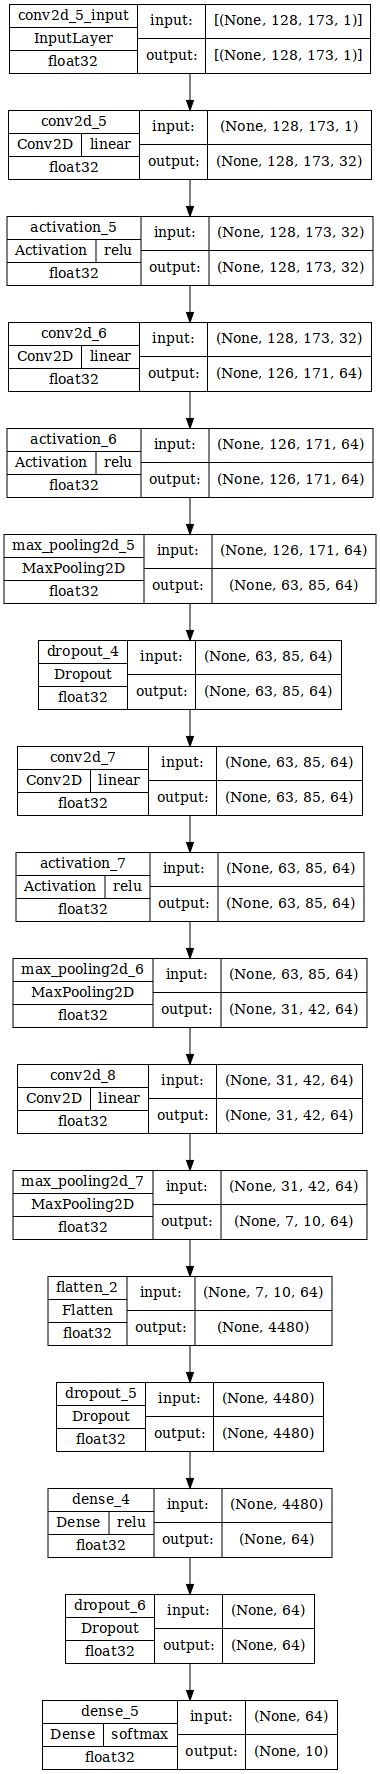

In [21]:
# Model definition
model_noname = keras.models.Sequential(name="CNN_NONAME", layers=[
    # First convolution block
    keras.layers.Conv2D(filters=32, kernel_size=(3, 3), padding="same", input_shape=(N_MELS, num_columns, num_channels)),
    keras.layers.Activation("relu"),

    # Second convolution block
    keras.layers.Conv2D(filters=64, kernel_size=(3, 3)),
    keras.layers.Activation("relu"),
    keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    keras.layers.Dropout(rate=0.5),

    # Third convolution block
    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding="same"),
    keras.layers.Activation("relu"),
    keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),

    # Fourth convolution block
    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding="same"),
    keras.layers.MaxPooling2D(pool_size=(4, 4), strides=(4, 4)),

    # Flatten and dropout
    keras.layers.Flatten(),
    keras.layers.Dropout(rate=0.5),

    # First dense block
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dropout(rate=0.5),

    # Second dense block. Using softmax to reduce to output to 10
    keras.layers.Dense(len(CLASSES), activation="softmax")
])

# Model summary and plot
model_noname.summary()
keras.utils.plot_model(
    model_noname,
    show_shapes=True, show_dtype=True, show_layer_names=True, show_layer_activations=True,
    rankdir="TB", dpi=72,
    to_file=(TEMP_FOLDER / "model_cnn_noname.png")
)

In [22]:
adam_optimizer = keras.optimizers.Adam(learning_rate=0.005)
model_noname.compile(loss="categorical_crossentropy", optimizer=adam_optimizer, metrics=["accuracy"])

In [15]:
noname_ckpt_name_base = "5_model-cnn-noname-ckpt"

checkpoint_callback = keras.callbacks.ModelCheckpoint(
    filepath=str(MODELS_FOLDER / f"{noname_ckpt_name_base}_e-{{epoch:02d}}_vloss-{{val_loss:.2f}}.hdf5"),
    monitor="val_loss",
    save_best_only=True,
    verbose=0
)

In [24]:
batch_size = 128
epochs = 200

start_time = timer()
training_noname = model_noname.fit(x=x_train, y=y_train, validation_split=0.080, batch_size=batch_size, epochs=epochs, callbacks=[checkpoint_callback], verbose=1)
print(f"The training of the \"{model_noname.name}\" model took {timedelta(seconds=(timer() - start_time))}.")

2023-02-15 22:16:00.396642: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 569189376 exceeds 10% of free system memory.


Epoch 1/200


2023-02-15 22:16:01.676860: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inCNN_NONAME/dropout_4/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
2023-02-15 22:16:02.521190: W tensorflow/tsl/framework/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.97GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2023-02-15 22:16:03.902201: W tensorflow/tsl/framework/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 5.05GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2023-02-15 22:16:04.119006: W tensorflow/tsl/framework/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to

51/51 [==============================] - 18s 290ms/step - loss: 2.0579 - accuracy: 0.2742 - val_loss: 1.7103 - val_accuracy: 0.3971
Epoch 2/200
51/51 [==============================] - 13s 264ms/step - loss: 1.6459 - accuracy: 0.4099 - val_loss: 1.6779 - val_accuracy: 0.3936
Epoch 3/200
51/51 [==============================] - 13s 264ms/step - loss: 1.3833 - accuracy: 0.5076 - val_loss: 1.1735 - val_accuracy: 0.5921
Epoch 4/200
51/51 [==============================] - 13s 263ms/step - loss: 1.2399 - accuracy: 0.5613 - val_loss: 1.2745 - val_accuracy: 0.5331
Epoch 5/200
51/51 [==============================] - 14s 265ms/step - loss: 1.0697 - accuracy: 0.6195 - val_loss: 0.9991 - val_accuracy: 0.6386
Epoch 6/200
51/51 [==============================] - 13s 264ms/step - loss: 0.9962 - accuracy: 0.6481 - val_loss: 1.0398 - val_accuracy: 0.6565
Epoch 7/200
51/51 [==============================] - 14s 266ms/step - loss: 0.9123 - accuracy: 0.6858 - val_loss: 0.9972 - val_accuracy: 0.6333
Epoc

In [16]:
model_noname = helpers.ckpts.load_best_model(models_folder=MODELS_FOLDER, base_name=noname_ckpt_name_base)

## D - Evaluating the models
The training of the models is finished, and it is time to compare their performance.

### D.1 - Accuracy and loss
We try to obtain a model with the highest possible accuracy score while keeping the loss score as low as possible.

In [17]:
helpers.perfs.print_model_metrics(model=model_milva, x_train=x_train, y_train=y_train, x_test=x_test, y_test=y_test)
helpers.perfs.print_model_metrics(model=model_chandelle, x_train=x_train, y_train=y_train, x_test=x_test, y_test=y_test)
helpers.perfs.print_model_metrics(model=model_toto, x_train=x_train, y_train=y_train, x_test=x_test, y_test=y_test)
helpers.perfs.print_model_metrics(model=model_noname, x_train=x_train, y_train=y_train, x_test=x_test, y_test=y_test)

2023-02-16 10:28:56.584056: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 618703360 exceeds 10% of free system memory.
2023-02-16 10:28:57.009127: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 618703360 exceeds 10% of free system memory.
2023-02-16 10:28:57.859078: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8100
2023-02-16 10:28:58.293054: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


Model metrics (CNN_Milva):
Training > loss=0.061 | accuracy=98.497
Testing > loss=0.375 | accuracy=90.269


2023-02-16 10:29:01.709980: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 618703360 exceeds 10% of free system memory.
2023-02-16 10:29:01.950404: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 618703360 exceeds 10% of free system memory.


Model metrics (CNN_Chandelle):
Training > loss=0.159 | accuracy=95.462
Testing > loss=0.539 | accuracy=84.144


2023-02-16 10:29:05.712348: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 618703360 exceeds 10% of free system memory.


Model metrics (CNN_Toto):
Training > loss=0.104 | accuracy=97.137
Testing > loss=0.478 | accuracy=86.090
Model metrics (CNN_NONAME):
Training > loss=0.224 | accuracy=93.601
Testing > loss=0.450 | accuracy=85.804


It is quite difficult to compare the models with these scores alone. Most of the training and test scores are very close, and additional charts are needed to determine the winner.

### D.2 - Loss curves

In [ ]:
helpers.perfs.plot_loss_curve(history=training_milva.history, model_name=model_milva.name)
helpers.perfs.plot_loss_curve(history=training_chandelle.history, model_name=model_chandelle.name)
helpers.perfs.plot_loss_curve(history=training_toto.history, model_name=model_toto.name)
helpers.perfs.plot_loss_curve(history=training_noname.history, model_name=model_noname.name)

### D.3 - Accuracy curves

In [ ]:
helpers.perfs.plot_accuracy_curve(history=training_milva.history, model_name=model_milva.name)
helpers.perfs.plot_accuracy_curve(history=training_chandelle.history, model_name=model_chandelle.name)
helpers.perfs.plot_accuracy_curve(history=training_toto.history, model_name=model_toto.name)
helpers.perfs.plot_accuracy_curve(history=training_noname.history, model_name=model_noname.name)

### D.4 - Confusion matrices

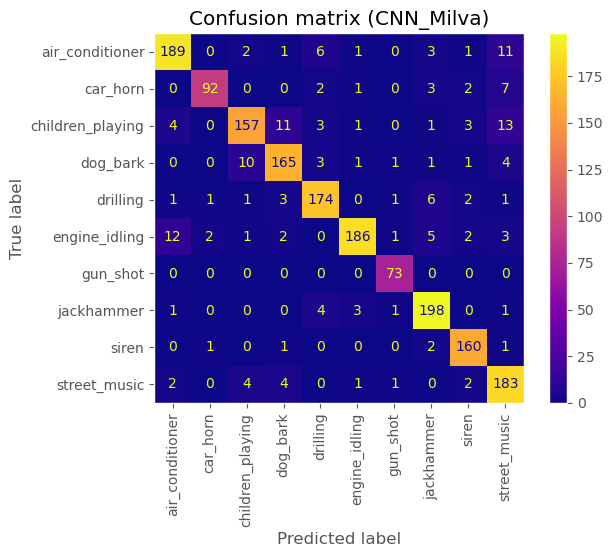

              Class Accuracy
0   air_conditioner  88.32 %
1          car_horn  85.98 %
2  children_playing  81.35 %
3          dog_bark  88.71 %
4          drilling  91.58 %
5     engine_idling  86.92 %
6          gun_shot  100.0 %
7        jackhammer  95.19 %
8             siren  96.97 %
9      street_music  92.89 %


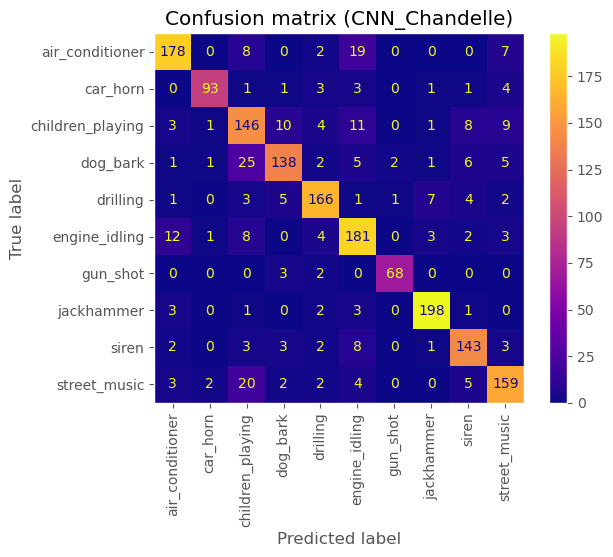

              Class Accuracy
0   air_conditioner  83.18 %
1          car_horn  86.92 %
2  children_playing  75.65 %
3          dog_bark  74.19 %
4          drilling  87.37 %
5     engine_idling  84.58 %
6          gun_shot  93.15 %
7        jackhammer  95.19 %
8             siren  86.67 %
9      street_music  80.71 %


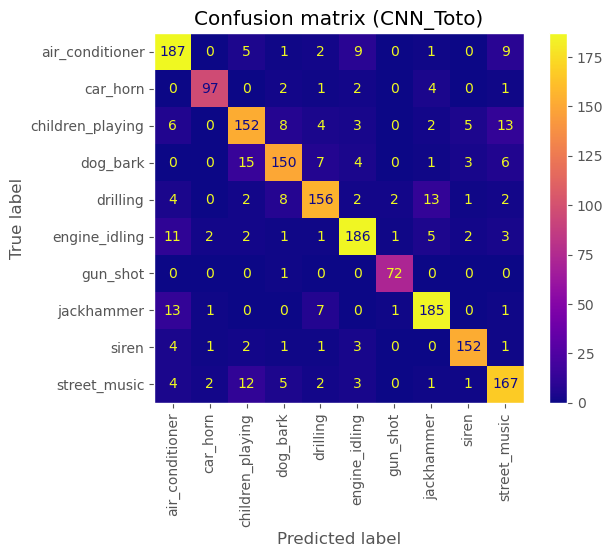

              Class Accuracy
0   air_conditioner  87.38 %
1          car_horn  90.65 %
2  children_playing  78.76 %
3          dog_bark  80.65 %
4          drilling  82.11 %
5     engine_idling  86.92 %
6          gun_shot  98.63 %
7        jackhammer  88.94 %
8             siren  92.12 %
9      street_music  84.77 %


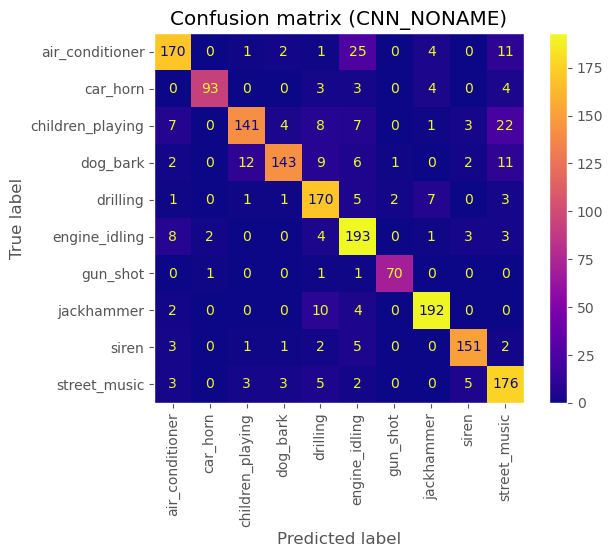

              Class Accuracy
0   air_conditioner  79.44 %
1          car_horn  86.92 %
2  children_playing  73.06 %
3          dog_bark  76.88 %
4          drilling  89.47 %
5     engine_idling  90.19 %
6          gun_shot  95.89 %
7        jackhammer  92.31 %
8             siren  91.52 %
9      street_music  89.34 %


In [18]:
helpers.perfs.plot_confusion_matrix(model=model_milva, x_test=x_test, y_test=y_test, le=label_encoder, classes=CLASSES)
helpers.perfs.plot_confusion_matrix(model=model_chandelle, x_test=x_test, y_test=y_test, le=label_encoder, classes=CLASSES)
helpers.perfs.plot_confusion_matrix(model=model_toto, x_test=x_test, y_test=y_test, le=label_encoder, classes=CLASSES)
helpers.perfs.plot_confusion_matrix(model=model_noname, x_test=x_test, y_test=y_test, le=label_encoder, classes=CLASSES)

### D.4 - Classification reports

In [19]:
helpers.perfs.print_classification_report(model=model_milva, x_test=x_test, y_test=y_test, le=label_encoder, classes=CLASSES)
helpers.perfs.print_classification_report(model=model_chandelle, x_test=x_test, y_test=y_test, le=label_encoder, classes=CLASSES)
helpers.perfs.print_classification_report(model=model_toto, x_test=x_test, y_test=y_test, le=label_encoder, classes=CLASSES)
helpers.perfs.print_classification_report(model=model_noname, x_test=x_test, y_test=y_test, le=label_encoder, classes=CLASSES)

Classification report (CNN_Milva):
                  precision    recall  f1-score   support

 air_conditioner       0.90      0.88      0.89       214
        car_horn       0.96      0.86      0.91       107
children_playing       0.90      0.81      0.85       193
        dog_bark       0.88      0.89      0.88       186
        drilling       0.91      0.92      0.91       190
   engine_idling       0.96      0.87      0.91       214
        gun_shot       0.94      1.00      0.97        73
      jackhammer       0.90      0.95      0.93       208
           siren       0.92      0.97      0.95       165
    street_music       0.82      0.93      0.87       197

        accuracy                           0.90      1747
       macro avg       0.91      0.91      0.91      1747
    weighted avg       0.90      0.90      0.90      1747

Classification report (CNN_Chandelle):
                  precision    recall  f1-score   support

 air_conditioner       0.88      0.83      0.85     

## E - Voting for the best model

## F - Conclusion of the model competition

<img src="../../assets/images/podium.png" alt="The model competition podium">